# DIRECT FEEDBACK ALIGNMENT ON MNIST

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100 
from keras.utils.np_utils import to_categorical
np.random.seed(1234)
%matplotlib inline

## CREATING DATASET

In [97]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [59]:
(Xc_train, yc_train), (Xc_test, yc_test) = cifar10.load_data()

Xc_train = Xc_train.astype('float32')
Xc_test = Xc_test.astype('float32')

Xc_train /= 255
Xc_test /= 255

In [80]:
(Xcc_train, ycc_train), (Xcc_test, ycc_test) = cifar100.load_data()

Xcc_train = Xcc_train.astype('float32')
Xcc_test = Xcc_test.astype('float32')

Xcc_train /= 255
Xcc_test /= 255

169009152/169001437 [==============================] - 24s 0us/step


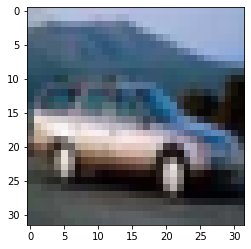

In [60]:
plt.imshow(Xc_train[4])

In [98]:
print ('Input dimensions')
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

print ('After reshaping:', X_train.shape, X_test.shape)

Input dimensions
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)
After reshaping: (60000, 784) (10000, 784)


In [61]:
print ('Input dimensions CIFAR')
print (Xc_train.shape, Xc_test.shape)
print (yc_train.shape, yc_test.shape)

Xc_train = Xc_train.reshape(50000, 32*32*3)
Xc_test = Xc_test.reshape(10000, 32*32*3)

print ('After reshaping:', Xc_train.shape, Xc_test.shape)

Input dimensions CIFAR
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)
After reshaping: (50000, 3072) (10000, 3072)


In [81]:
print ('Input dimensions CIFAR100')
print (Xcc_train.shape, Xcc_test.shape)
print (ycc_train.shape, ycc_test.shape)

Xcc_train = Xcc_train.reshape(50000, 32*32*3)
Xcc_test = Xcc_test.reshape(10000, 32*32*3)

print ('After reshaping:', Xcc_train.shape, Xcc_test.shape)

Input dimensions CIFAR100
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)
After reshaping: (50000, 3072) (10000, 3072)


In [62]:
print ('Sample of label:', yc_train[0])

Sample of label: [6]


In [70]:
Xc_train.shape[1]

3072

In [99]:
nb_classes = 10
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)


In [63]:
yc_train = to_categorical(yc_train, nb_classes)
yc_test = to_categorical(yc_test, nb_classes)

In [82]:
nbc_classes=100
ycc_train = to_categorical(ycc_train, nbc_classes)
ycc_test = to_categorical(ycc_test, nbc_classes)

In [100]:
print ('After conversion to categorical:', y_train[0])

After conversion to categorical: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## DEFINITION OF FORWARD AND BACKWARD PASS

In [31]:
# import of sigmoid and crossentropy
from scipy.special import expit
from sklearn.metrics import log_loss

In [32]:
def forward_pass(W1, W2, b1, b2, x):
    '''This is the forward pass. It is equal for any
    training algorithm. It's just one hidden layer
    with tanh activation function and sigmoid on the
    output layer'''
    # if the input is a batch, I have to tile as many
    # b1 and b2 as the batch size
    a1 = np.matmul(W1, x)+np.tile(b1, x.shape[1])
    h1 = np.tanh(a1)
    a2 = np.matmul(W2, h1)+np.tile(b2, x.shape[1])
    y_hat = expit(a2)
    return a1, h1, a2, y_hat

In [15]:
def backprop_backward_pass(e, h1, W2, a1, x):
    dW2 = -np.matmul(e, np.transpose(h1))
    da1 = np.matmul(np.transpose(W2), e)*(1-np.tanh(a1)**2)
    dW1 = -np.matmul(da1, np.transpose(x))
    db1 = -np.sum(da1, axis=1)
    db2 = -np.sum(e, axis=1)
    return dW1, dW2, db1[:,np.newaxis], db2[:,np.newaxis]

In [101]:
def backpropdp_backward_pass(e, h1, W2, a1, x, sigma):
    dW2 = -np.matmul(e, np.transpose(h1))+np.random.normal(0,sigma**2)
    da1 = np.matmul(np.transpose(W2), e)*(1-np.tanh(a1)**2)+np.random.normal(0,sigma**2)
    dW1 = -np.matmul(da1, np.transpose(x))+np.random.normal(0,sigma**2)
    db1 = -np.sum(da1, axis=1)+np.random.normal(0,sigma**2)
    db2 = -np.sum(e, axis=1)+np.random.normal(0,sigma**2)
    return dW1, dW2, db1[:,np.newaxis], db2[:,np.newaxis]

In [16]:
def dfa_backward_pass(e, h1, B1, a1, x):
    dW2 = -np.matmul(e, np.transpose(h1))
    da1 = np.matmul(B1, e)*(1-np.tanh(a1)**2)
    dW1 = -np.matmul(da1, np.transpose(x))
    db1 = -np.sum(da1, axis=1)
    db2 = -np.sum(e, axis=1)
    return dW1, dW2, db1[:,np.newaxis], db2[:,np.newaxis]

In [111]:
def dfadp_backward_pass(e, h1, B1, a1, x, sigma):
    dW2 = -np.matmul(e, np.transpose(h1))+np.random.normal(0,sigma**2)
    da1 = np.matmul(B1, e)*(1-np.tanh(a1)**2)+np.random.normal(0,sigma**2)
    dW1 = -np.matmul(da1, np.transpose(x))+np.random.normal(0,sigma**2)
    db1 = -np.sum(da1, axis=1)+np.random.normal(0,sigma**2)
    db2 = -np.sum(e, axis=1)+np.random.normal(0,sigma**2)
    return dW1, dW2, db1[:,np.newaxis], db2[:,np.newaxis]

## DEFINITION OF FUNCTION TO COMPUTE ANGLE BETWEEN UPDATES

In [17]:
def average_angle(W2, B1, error, a1, a2):
    dh1 = np.mean(np.matmul(B1, error), axis=1)[:, np.newaxis] #forse non ci va la derivata
    c1 = np.mean(np.matmul(np.transpose(W2), error*(expit(a2)*(1-expit(a2)))), axis=1)[:, np.newaxis]
    dh1_norm = np.linalg.norm(dh1)
    c1_norm = np.linalg.norm(c1)
    inverse_dh1_norm = np.power(dh1_norm, -1)
    inverse_c1_norm = np.power(c1_norm, -1)
    
    # ALIGNMENT CRITERION AND ANGLE
    Lk = (np.matmul(np.transpose(dh1), c1)*inverse_dh1_norm)[0, 0]
    beta = np.arccos(np.clip(Lk*inverse_c1_norm, -1., 1.))*180/np.pi
    return Lk, beta

In [88]:
def train(x, y, n_epochs=10, lr=1e-3, batch_size=200, tol=1e-1):
    x = np.transpose(x)
    y = np.transpose(y)
    
    W1, W2 = np.random.randn(800, x.shape[0]), np.random.randn(10, 800)
    b1, b2 = np.random.randn(800, 1), np.random.randn(10, 1)
    
    dataset_size = x.shape[1]
    n_batches = dataset_size//batch_size
    te_bp = []
    for i in range(n_epochs):
        perm = np.random.permutation(x.shape[1])
        x = x[:, perm]
        y = y[:, perm]
        loss = 0.
        train_error = 0.
        for j in range(n_batches):
            samples = x[:, j*batch_size:(j+1)*batch_size]
            targets = y[:, j*batch_size:(j+1)*batch_size]
            a1, h1, a2, y_hat = forward_pass(W1, W2, b1, b2, samples)
            error = y_hat - targets
            preds = np.argmax(y_hat, axis=0) 
            truth = np.argmax(targets, axis=0)
            train_error += np.sum(preds!=truth)
            loss_on_batch = log_loss(targets, y_hat)
            
            dW1, dW2, db1, db2 = backprop_backward_pass(error, h1, W2, a1, samples)
            W1 += lr*dW1
            W2 += lr*dW2
            b1 += lr*db1
            b2 += lr*db2
            loss += loss_on_batch
        training_error = 1.*train_error/x.shape[1]
        print ('Loss at epoch', i+1, ':', loss/x.shape[1])
        print ('Training error:', training_error)
        prev_training_error = 0 if i==0 else te_bp[-1]
        te_bp.append(training_error)
    return W1, W2, b1, b2, te_bp

In [104]:
def traindp(x, y, n_epochs=10, lr=1e-3, batch_size=200, tol=1e-1, sigma=10):
    x = np.transpose(x)
    y = np.transpose(y)
    
    W1, W2 = np.random.randn(800, x.shape[0]), np.random.randn(10, 800)
    b1, b2 = np.random.randn(800, 1), np.random.randn(10, 1)
    
    dataset_size = x.shape[1]
    n_batches = dataset_size//batch_size
    te_bp = []
    for i in range(n_epochs):
        perm = np.random.permutation(x.shape[1])
        x = x[:, perm]
        y = y[:, perm]
        loss = 0.
        train_error = 0.
        for j in range(n_batches):
            samples = x[:, j*batch_size:(j+1)*batch_size]
            targets = y[:, j*batch_size:(j+1)*batch_size]
            a1, h1, a2, y_hat = forward_pass(W1, W2, b1, b2, samples)
            error = y_hat - targets
            preds = np.argmax(y_hat, axis=0) 
            truth = np.argmax(targets, axis=0)
            train_error += np.sum(preds!=truth)
            loss_on_batch = log_loss(targets, y_hat)
            
            dW1, dW2, db1, db2 = backpropdp_backward_pass(error, h1, W2, a1, samples, sigma)
            W1 += lr*dW1
            W2 += lr*dW2
            b1 += lr*db1
            b2 += lr*db2
            loss += loss_on_batch
        training_error = 1.*train_error/x.shape[1]
        print ('Loss at epoch', i+1, ':', loss/x.shape[1])
        print ('Training error:', training_error)
        prev_training_error = 0 if i==0 else te_bp[-1]
        te_bp.append(training_error)
    return W1, W2, b1, b2, te_bp

In [89]:
def traincc(x, y, n_epochs=10, lr=1e-3, batch_size=200, tol=1e-1):
    x = np.transpose(x)
    y = np.transpose(y)
    
    W1, W2 = np.random.randn(800, x.shape[0]), np.random.randn(100, 800)
    b1, b2 = np.random.randn(800, 1), np.random.randn(100, 1)
    
    dataset_size = x.shape[1]
    n_batches = dataset_size//batch_size
    te_bp = []
    for i in range(n_epochs):
        perm = np.random.permutation(x.shape[1])
        x = x[:, perm]
        y = y[:, perm]
        loss = 0.
        train_error = 0.
        for j in range(n_batches):
            samples = x[:, j*batch_size:(j+1)*batch_size]
            targets = y[:, j*batch_size:(j+1)*batch_size]
            a1, h1, a2, y_hat = forward_pass(W1, W2, b1, b2, samples)
            error = y_hat - targets
            preds = np.argmax(y_hat, axis=0) 
            truth = np.argmax(targets, axis=0)
            train_error += np.sum(preds!=truth)
            loss_on_batch = log_loss(targets, y_hat)
            
            dW1, dW2, db1, db2 = backprop_backward_pass(error, h1, W2, a1, samples)
            W1 += lr*dW1
            W2 += lr*dW2
            b1 += lr*db1
            b2 += lr*db2
            loss += loss_on_batch
        training_error = 1.*train_error/x.shape[1]
        print ('Loss at epoch', i+1, ':', loss/x.shape[1])
        print ('Training error:', training_error)
        prev_training_error = 0 if i==0 else te_bp[-1]
        te_bp.append(training_error)
    return W1, W2, b1, b2, te_bp

In [69]:
W1, W2, b1, b2, te_bp = train(X_train, y_train, n_epochs=100, lr=5*1e-4, batch_size=200, tol=1e-4)

Loss at epoch 1 : 0.0
Training error: 0.0
Loss at epoch 2 : 0.0
Training error: 0.0
Loss at epoch 3 : 0.0
Training error: 0.0
Loss at epoch 4 : 0.0
Training error: 0.0
Loss at epoch 5 : 0.0
Training error: 0.0
Loss at epoch 6 : 0.0
Training error: 0.0
Loss at epoch 7 : 0.0
Training error: 0.0
Loss at epoch 8 : 0.0
Training error: 0.0
Loss at epoch 9 : 0.0
Training error: 0.0
Loss at epoch 10 : 0.0
Training error: 0.0
Loss at epoch 11 : 0.0
Training error: 0.0
Loss at epoch 12 : 0.0
Training error: 0.0
Loss at epoch 13 : 0.0
Training error: 0.0
Loss at epoch 14 : 0.0
Training error: 0.0
Loss at epoch 15 : 0.0
Training error: 0.0
Loss at epoch 16 : 0.0
Training error: 0.0
Loss at epoch 17 : 0.0
Training error: 0.0
Loss at epoch 18 : 0.0
Training error: 0.0
Loss at epoch 19 : 0.0
Training error: 0.0
Loss at epoch 20 : 0.0
Training error: 0.0
Loss at epoch 21 : 0.0
Training error: 0.0
Loss at epoch 22 : 0.0
Training error: 0.0
Loss at epoch 23 : 0.0
Training error: 0.0
Loss at epoch 24 : 0

KeyboardInterrupt: 

In [116]:
W1p, W2p, b1p, b2p, te_bpp = traindp(X_train, y_train, n_epochs=100, lr=5*1e-4, batch_size=200, tol=1e-4, sigma=.4)

Loss at epoch 1 : 0.8468767624610659
Training error: 0.3216333333333333
Loss at epoch 2 : 0.6064882827006942
Training error: 0.20063333333333333
Loss at epoch 3 : 0.5754117829943847
Training error: 0.17455
Loss at epoch 4 : 0.6674077351503958
Training error: 0.31966666666666665
Loss at epoch 5 : 0.5631831441148443
Training error: 0.40996666666666665
Loss at epoch 6 : 0.4991425011147561
Training error: 0.4918166666666667
Loss at epoch 7 : 0.439402983300076
Training error: 0.3801333333333333
Loss at epoch 8 : 0.41879266826797484
Training error: 0.3151833333333333
Loss at epoch 9 : 0.4093358316565617
Training error: 0.24726666666666666
Loss at epoch 10 : 0.4196110956215717
Training error: 0.2157
Loss at epoch 11 : 0.4646154623726467
Training error: 0.1824
Loss at epoch 12 : 0.48381431799998365
Training error: 0.15101666666666666
Loss at epoch 13 : 0.5341689392802501
Training error: 0.14155
Loss at epoch 14 : 0.48147247929893516
Training error: 0.13768333333333332
Loss at epoch 15 : 0.4847

In [126]:
W1cp, W2cp, b1cp, b2cp, te_bpcp = traindp(Xc_train, yc_train, n_epochs=100, lr=5*1e-4, batch_size=200, tol=1e-4,sigma=.1)

Loss at epoch 1 : 1.213283770038482
Training error: 0.80588
Loss at epoch 2 : 0.9492845201176117
Training error: 0.79552
Loss at epoch 3 : 0.8921464697566791
Training error: 0.78282
Loss at epoch 4 : 0.9236862114897382
Training error: 0.76902
Loss at epoch 5 : 0.7979303058469085
Training error: 0.79138
Loss at epoch 6 : 0.774146113921305
Training error: 0.79232
Loss at epoch 7 : 0.7842701208369909
Training error: 0.76238
Loss at epoch 8 : 0.7334665251966852
Training error: 0.78034
Loss at epoch 9 : 0.6957645566516409
Training error: 0.7818
Loss at epoch 10 : 0.6683300504111206
Training error: 0.78704
Loss at epoch 11 : 0.6326666117148864
Training error: 0.79786
Loss at epoch 12 : 0.6361200447177323
Training error: 0.78378
Loss at epoch 13 : 0.7177999802985935
Training error: 0.7606
Loss at epoch 14 : 0.6699272901235723
Training error: 0.76612
Loss at epoch 15 : 0.6709628068691792
Training error: 0.74652
Loss at epoch 16 : 0.6758300397752698
Training error: 0.75454
Loss at epoch 17 : 0.

In [90]:
W1cc, W2cc, b1cc, b2cc, te_bpcc = traincc(Xcc_train, ycc_train, n_epochs=100, lr=5*1e-4, batch_size=200, tol=1e-4)

Loss at epoch 1 : 0.20251625977795817
Training error: 0.98358
Loss at epoch 2 : 0.10294017625905758
Training error: 0.98222
Loss at epoch 3 : 0.07386725796114996
Training error: 0.98482
Loss at epoch 4 : 0.06415292374668978
Training error: 0.9862
Loss at epoch 5 : 0.06088186635138142
Training error: 0.98484
Loss at epoch 6 : 0.059259565754073026
Training error: 0.98524
Loss at epoch 7 : 0.058200177127504575
Training error: 0.98504
Loss at epoch 8 : 0.057481835914217336
Training error: 0.98314
Loss at epoch 9 : 0.056874753561619015
Training error: 0.98182
Loss at epoch 10 : 0.05644951934626749
Training error: 0.98058
Loss at epoch 11 : 0.0560499688303634
Training error: 0.98054
Loss at epoch 12 : 0.055734717803401425
Training error: 0.97962
Loss at epoch 13 : 0.055420807224590606
Training error: 0.9782
Loss at epoch 14 : 0.055174356008208886
Training error: 0.97846
Loss at epoch 15 : 0.054960538694019685
Training error: 0.9772
Loss at epoch 16 : 0.05471586666277529
Training error: 0.976

In [75]:
def dfa_train(x, y, n_epochs=10, lr=1e-3, batch_size=200, tol=1e-3):
    x = np.transpose(x)
    y = np.transpose(y)
    
    W1, W2 = np.random.randn(800, x.shape[0]), np.random.randn(10, 800)
    b1, b2 = np.random.randn(800, 1), np.random.randn(10, 1)
    
    B1 = np.random.randn(800, 10)
    dataset_size = x.shape[1]
    n_batches = dataset_size//batch_size
    te_dfa = []
    angles = []
    for i in range(n_epochs):
        perm = np.random.permutation(x.shape[1])
        x = x[:, perm]
        y = y[:, perm]
        loss = 0.
        train_error = 0.
        for j in range(n_batches):
            samples = x[:, j*batch_size:(j+1)*batch_size]
            targets = y[:, j*batch_size:(j+1)*batch_size]
            a1, h1, a2, y_hat = forward_pass(W1, W2, b1, b2, samples)
            error = y_hat - targets
            preds = np.argmax(y_hat, axis=0) 
            truth = np.argmax(targets, axis=0)
            train_error += 1.*np.sum(preds!=truth)
            loss_on_batch = log_loss(targets, y_hat)
            
            dW1, dW2, db1, db2 = dfa_backward_pass(error, h1, B1, a1, samples)
            W1 += lr*dW1
            W2 += lr*dW2
            b1 += lr*db1
            b2 += lr*db2
            loss += loss_on_batch
            if j%100==0:
                angles.append(average_angle(W2, B1, error, a1, a2))
        training_error = 1.*train_error/x.shape[1]
        print ('Loss at epoch', i+1, ':', loss/x.shape[1])
        print ('Training error:', training_error)
        prev_training_error = 0 if i==0 else te_dfa[-1]
        te_dfa.append(training_error)
    return W1, W2, b1, b2, te_dfa, angles

In [109]:
def dfadp_train(x, y, n_epochs=10, lr=1e-3, batch_size=200, tol=1e-3,sigma=1):
    x = np.transpose(x)
    y = np.transpose(y)
    
    W1, W2 = np.random.randn(800, x.shape[0]), np.random.randn(10, 800)
    b1, b2 = np.random.randn(800, 1), np.random.randn(10, 1)
    
    B1 = np.random.randn(800, 10)
    dataset_size = x.shape[1]
    n_batches = dataset_size//batch_size
    te_dfa = []
    angles = []
    for i in range(n_epochs):
        perm = np.random.permutation(x.shape[1])
        x = x[:, perm]
        y = y[:, perm]
        loss = 0.
        train_error = 0.
        for j in range(n_batches):
            samples = x[:, j*batch_size:(j+1)*batch_size]
            targets = y[:, j*batch_size:(j+1)*batch_size]
            a1, h1, a2, y_hat = forward_pass(W1, W2, b1, b2, samples)
            error = y_hat - targets
            preds = np.argmax(y_hat, axis=0) 
            truth = np.argmax(targets, axis=0)
            train_error += 1.*np.sum(preds!=truth)
            loss_on_batch = log_loss(targets, y_hat)
            
            dW1, dW2, db1, db2 = dfadp_backward_pass(error, h1, B1, a1, samples,sigma)
            W1 += lr*dW1
            W2 += lr*dW2
            b1 += lr*db1
            b2 += lr*db2
            loss += loss_on_batch
            if j%100==0:
                angles.append(average_angle(W2, B1, error, a1, a2))
        training_error = 1.*train_error/x.shape[1]
        print ('Loss at epoch', i+1, ':', loss/x.shape[1])
        print ('Training error:', training_error)
        prev_training_error = 0 if i==0 else te_dfa[-1]
        te_dfa.append(training_error)
    return W1, W2, b1, b2, te_dfa, angles

In [118]:
W1dfap, W2dfap, b1dfap, b2dfap, te_dfap, anglesp = dfadp_train(X_train, y_train, n_epochs=100, lr=5*1e-4, batch_size=200, tol=1e-4,sigma=.4)

Loss at epoch 1 : 1.0477102060756547
Training error: 0.44361666666666666
Loss at epoch 2 : 0.7488514579292698
Training error: 0.42546666666666666
Loss at epoch 3 : 0.5669111139579202
Training error: 0.50345
Loss at epoch 4 : 0.4678656809920174
Training error: 0.39958333333333335
Loss at epoch 5 : 0.4180562266452098
Training error: 0.25443333333333334
Loss at epoch 6 : 0.5524899751383289
Training error: 0.2471
Loss at epoch 7 : 0.5624475539930912
Training error: 0.19268333333333335
Loss at epoch 8 : 0.4657724675593044
Training error: 0.20491666666666666
Loss at epoch 9 : 0.4581936715652656
Training error: 0.15911666666666666
Loss at epoch 10 : 0.4142968811289043
Training error: 0.179
Loss at epoch 11 : 0.46441219553184726
Training error: 0.14935
Loss at epoch 12 : 0.4175453746588437
Training error: 0.30573333333333336
Loss at epoch 13 : 0.4066739023796819
Training error: 0.3106333333333333
Loss at epoch 14 : 0.4047026717451649
Training error: 0.3072166666666667
Loss at epoch 15 : 0.3770

In [91]:
def dfa_traincc(x, y, n_epochs=10, lr=1e-3, batch_size=200, tol=1e-3):
    x = np.transpose(x)
    y = np.transpose(y)
    
    W1, W2 = np.random.randn(800, x.shape[0]), np.random.randn(100, 800)
    b1, b2 = np.random.randn(800, 1), np.random.randn(100, 1)
    
    B1 = np.random.randn(800, 100)
    dataset_size = x.shape[1]
    n_batches = dataset_size//batch_size
    te_dfa = []
    angles = []
    for i in range(n_epochs):
        perm = np.random.permutation(x.shape[1])
        x = x[:, perm]
        y = y[:, perm]
        loss = 0.
        train_error = 0.
        for j in range(n_batches):
            samples = x[:, j*batch_size:(j+1)*batch_size]
            targets = y[:, j*batch_size:(j+1)*batch_size]
            a1, h1, a2, y_hat = forward_pass(W1, W2, b1, b2, samples)
            error = y_hat - targets
            preds = np.argmax(y_hat, axis=0) 
            truth = np.argmax(targets, axis=0)
            train_error += 1.*np.sum(preds!=truth)
            loss_on_batch = log_loss(targets, y_hat)
            
            dW1, dW2, db1, db2 = dfa_backward_pass(error, h1, B1, a1, samples)
            W1 += lr*dW1
            W2 += lr*dW2
            b1 += lr*db1
            b2 += lr*db2
            loss += loss_on_batch
            if j%100==0:
                angles.append(average_angle(W2, B1, error, a1, a2))
        training_error = 1.*train_error/x.shape[1]
        print ('Loss at epoch', i+1, ':', loss/x.shape[1])
        print ('Training error:', training_error)
        prev_training_error = 0 if i==0 else te_dfa[-1]
        te_dfa.append(training_error)
    return W1, W2, b1, b2, te_dfa, angles

In [127]:
W1dfac, W2dfac, b1dfac, b2dfac, te_dfac, anglesc = dfadp_train(Xc_train, yc_train, n_epochs=100, lr=5*1e-4, batch_size=200, tol=1e-4,sigma=.1)

Loss at epoch 1 : 1.7506000314171606
Training error: 0.84882
Loss at epoch 2 : 1.3730495276332992
Training error: 0.81136
Loss at epoch 3 : 1.1585092014573024
Training error: 0.79062
Loss at epoch 4 : 1.025420263528659
Training error: 0.77676
Loss at epoch 5 : 0.9382839614816098
Training error: 0.77052
Loss at epoch 6 : 0.8619584193706684
Training error: 0.76452
Loss at epoch 7 : 0.8076889029499215
Training error: 0.76218
Loss at epoch 8 : 0.7643695711940026
Training error: 0.75498
Loss at epoch 9 : 0.7233867880207743
Training error: 0.75066
Loss at epoch 10 : 0.7034213870764325
Training error: 0.75252
Loss at epoch 11 : 0.6958759590202936
Training error: 0.75482
Loss at epoch 12 : 0.7289982274634246
Training error: 0.75058
Loss at epoch 13 : 0.7084598870927163
Training error: 0.75278
Loss at epoch 14 : 0.7187583144096432
Training error: 0.74808
Loss at epoch 15 : 0.689067497283641
Training error: 0.75088
Loss at epoch 16 : 0.6654227872933515
Training error: 0.75826
Loss at epoch 17 : 

In [ ]:
W1dfacp, W2dfacp, b1dfacp, b2dfacp, te_dfacp, anglescp = dfa_train(Xc_train, yc_train, n_epochs=100, lr=5*1e-4, batch_size=200, tol=1e-4)

In [92]:
W1dfacc, W2dfacc, b1dfacc, b2dfacc, te_dfacc, anglescc = dfa_traincc(Xcc_train, ycc_train, n_epochs=100, lr=5*1e-4, batch_size=200, tol=1e-4)

Loss at epoch 1 : 0.27084139310849437
Training error: 0.98782
Loss at epoch 2 : 0.24845712198814476
Training error: 0.98266
Loss at epoch 3 : 0.23534788061447395
Training error: 0.97774
Loss at epoch 4 : 0.22260481280120464
Training error: 0.97368
Loss at epoch 5 : 0.21129873360725024
Training error: 0.96896
Loss at epoch 6 : 0.20327411063633316
Training error: 0.9668
Loss at epoch 7 : 0.19729658928370633
Training error: 0.9644
Loss at epoch 8 : 0.19359138683073265
Training error: 0.96434
Loss at epoch 9 : 0.1881390283553464
Training error: 0.9639
Loss at epoch 10 : 0.17919234130941022
Training error: 0.96066
Loss at epoch 11 : 0.17319213161207225
Training error: 0.9564
Loss at epoch 12 : 0.16750982913948068
Training error: 0.95452
Loss at epoch 13 : 0.16271057139495484
Training error: 0.95562
Loss at epoch 14 : 0.15711306784935042
Training error: 0.9535
Loss at epoch 15 : 0.15200272655733402
Training error: 0.95314
Loss at epoch 16 : 0.14826814880825195
Training error: 0.95242
Loss at

In [42]:
def test(W1, W2, b1, b2, test_samples, test_targets):
    test_samples = np.transpose(test_samples)
    test_targets = np.transpose(test_targets)
    outs = forward_pass(W1, W2, b1, b2, test_samples)[-1]
    preds = np.argmax(outs, axis=0) 
    truth = np.argmax(test_targets, axis=0)
    test_error = 1.*np.sum(preds!=truth)/preds.shape[0]
    return test_error

In [78]:
print ('BP:', test(W1c, W2c, b1c, b2c, Xc_test, yc_test)*100, '%')
print ('DFA:', test(W1dfac, W2dfac, b1dfac, b2dfac, Xc_test, yc_test)*100, '%')

BP: 70.35 %
DFA: 63.0 %


In [129]:
print ('BP:', test(W1cp, W2cp, b1cp, b2cp, Xc_test, yc_test)*100, '%')
print ('DFA:', test(W1dfac, W2dfac, b1dfac, b2dfac, Xc_test, yc_test)*100, '%')

BP: 75.51 %
DFA: 70.78 %


In [120]:
print ('BP:', test(W1p, W2p, b1p, b2p, X_test, y_test)*100, '%')
print ('DFA:', test(W1dfap, W2dfap, b1dfap, b2dfap, X_test, y_test)*100, '%')

BP: 12.839999999999998 %
DFA: 14.219999999999999 %


In [ ]:
print ('BP:', test(W1, W2, b1, b2, X_test, y_test)*100, '%')
print ('DFA:', test(W1dfa, W2dfa, b1dfa, b2dfa, X_test, y_test)*100, '%')

In [93]:
print ('BP:', test(W1cc, W2cc, b1cc, b2cc, Xcc_test, ycc_test)*100, '%')
print ('DFA:', test(W1dfacc, W2dfacc, b1dfacc, b2dfacc, Xcc_test, ycc_test)*100, '%')

BP: 96.58 %
DFA: 87.58 %


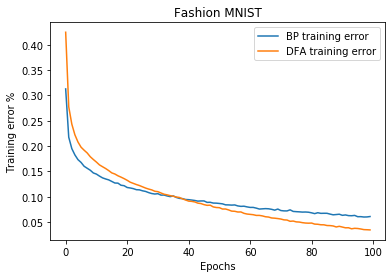

In [46]:
plt.plot(range(len(te_bp)), te_bp, label='BP training error')
plt.plot(range(len(te_dfa)), te_dfa, label='DFA training error')
plt.title('Fashion MNIST')
plt.xlabel('Epochs')
plt.ylabel('Training error %')
plt.legend(loc='best')
plt.show()

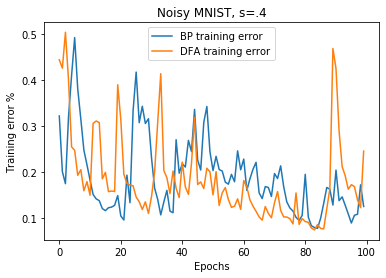

In [122]:
plt.plot(range(len(te_bpp)), te_bpp, label='BP training error')
plt.plot(range(len(te_dfap)), te_dfap, label='DFA training error')
plt.title('Noisy MNIST, s=.4')
plt.xlabel('Epochs')
plt.ylabel('Training error %')
plt.legend(loc='best')
plt.show()

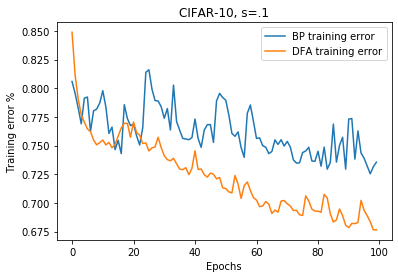

In [130]:
plt.plot(range(len(te_bpcp)), te_bpcp, label='BP training error')
plt.plot(range(len(te_dfac)), te_dfac, label='DFA training error')
plt.title('CIFAR-10, s=.1')
plt.xlabel('Epochs')
plt.ylabel('Training error %')
plt.legend(loc='best')
plt.show()

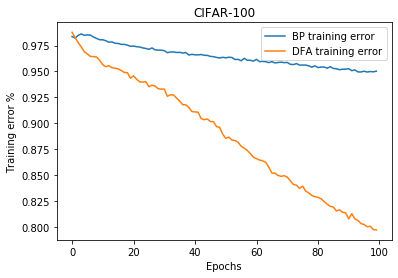

In [94]:
plt.plot(range(len(te_bpcc)), te_bpcc, label='BP training error')
plt.plot(range(len(te_dfacc)), te_dfacc, label='DFA training error')
plt.title('CIFAR-100')
plt.xlabel('Epochs')
plt.ylabel('Training error %')
plt.legend(loc='best')
plt.show()

In [40]:
l, beta = zip(*angles)

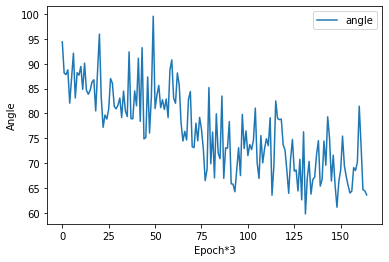

In [41]:
plt.plot(range(len(beta)), beta, label='angle')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Angle')
plt.show()